In [107]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from implementations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Load and clean the training data**

We load the training data.

In [108]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("../data")

print(f"The data has {x_train.shape[0]} samples and {x_train.shape[1]} features !")

The data has 328135 samples and 321 features !


For each feature, we clean the data so the values make more sense

In [109]:
x_train[:, 240] = replace(x_train[:, 240], [np.nan, 77, 99], [-1, -1, -1])
x_train[:, 246] = replace(x_train[:, 246], [np.nan, 14], [-1, -1])
x_train[:, 247] = replace(x_train[:, 247], [np.nan, 3], [-1, -1])
x_train[:, 252] = replace(x_train[:, 252], [np.nan, 99999], [np.nan, np.nan])
x_train[:, 261] = replace(x_train[:, 261], [np.nan, 7, 9], [-1, -1, -1])
x_train[:, 262] = replace(x_train[:, 262], [np.nan, 900], [-1, -1])
x_train[:, 298] = replace(x_train[:, 298], [np.nan, 9], [1, 1])

rep_one = [241, 242, 243, 244, 255, 256, 257, 258, 259, 260, 263, 265, 278, 279, 284, 
          305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]

for i in rep_one : 
    x_train[:, i] = replace(x_train[:, i], [np.nan, 9], [-1, -1])
    
rep_two = [245, 249, 254, 289, 290, 291, 292]

for i in rep_two : 
    x_train[:, i] = replace(x_train[:, i], [np.nan], [-1])
    

x_train[:, 264] = replace(x_train[:, 264], [np.nan, 99900], [-1, -1])
x_train[:, 287] = replace(x_train[:, 287], [np.nan, 99900], [-1, -1])
x_train[:, 288] = replace(x_train[:, 288], [np.nan, 99900], [-1, -1])

x_train[:, 272] = replace(x_train[:, 272], [np.nan], [0])
x_train[:, 273] = replace(x_train[:, 273], [np.nan], [0])

x_train[:, 274] = replace(x_train[:, 274], [np.nan], [1])
x_train[:, 275] = replace(x_train[:, 275], [np.nan], [1])
x_train[:, 280] = replace(x_train[:, 280], [np.nan], [1])
x_train[:, 281] = replace(x_train[:, 281], [np.nan], [1])

x_train[:, 282] = replace(x_train[:, 282], [np.nan], [2])
x_train[:, 283] = replace(x_train[:, 283], [np.nan], [2])

x_train[:, 293] = replace(x_train[:, 293], [np.nan, 99000], [np.nan, np.nan])
x_train[:, 294] = replace(x_train[:, 294], [np.nan, 99000], [np.nan, np.nan])
x_train[:, 297] = replace(x_train[:, 297], [np.nan, 99000], [np.nan, np.nan])

We then clean the data by : 
- removing the nan values by the mean of the rest of the feature
- removing the features where the variance is zero since they are constants for all samples
- remove the 8 first features as the appear weird in the task of predicting a heart attack

In [110]:
x_train, zero_var_features = gen_clean(x_train)
print(f"The data has now {x_train.shape[1]} features !")

The data has now 306 features !


# PCA algorithm

In [113]:
pca_indices, idx = pca(x_train)
print(f"We can keep the {idx} first most influent features given by pca_indices")

We can keep the 138 first most influent features given by pca_indices


In [117]:
x_train_pca = x_train[:, pca_indices]
x_train_pca = x_train_pca[:, :(idx + 1)]
print(f"The data has now {x_train_pca.shape[1]} features")

The data has now 139 features


# Linear regression 

We train our model using linear regression with mean-square error.

First, we separate our data in a training set(70%) and testing set(30%).

In [135]:
tx_tr, tx_te, y_tr, y_te = cross(x_train_pca, y_train, 0.7)

print(f"tx_tr shape : {tx_tr.shape} ; tx_te shape : {tx_te.shape}")
print(f"       y_tr : {y_tr.shape}     ;        y_te : {y_te.shape}")

tx_tr shape : (229694, 139) ; tx_te shape : (98441, 139)
       y_tr : (229694,)     ;        y_te : (98441,)


Now we build our models for linear regression

In [136]:
y, tx = build_model_data(tx_tr, y_tr)
y_test, tx_test = build_model_data(tx_te, y_te)
print(f"The data has now {tx.shape[1]} features !")

The data has now 140 features !


## Training

Here we train our model using GD with MSE

In [120]:
initial_w = np.zeros(tx.shape[1])
max_iters = 100
gamma = 0.09

start_time = datetime.datetime.now()
w, loss = mean_squared_error_gd(y, tx, initial_w, max_iters, gamma)
end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds")

Execution time 5.11491 seconds


### Computation of metrics

We first compute some metrics on the training data (60% of the total data)

In [121]:
pred_data = np.dot(tx, w)

pred_data[pred_data > 0] = 1
pred_data[pred_data < 0] = -1

correctly_classified_data = np.sum(pred_data == y)

tp = np.sum((pred_data == 1) & (y == 1))
fp = np.sum((pred_data == 1) & (y == -1))

tn = np.sum((pred_data == -1) & (y == -1))
fn = np.sum((pred_data == -1) & (y == 1))

accuracy_data = (tp + tn)/(tp + fp + tn + fn)

print(f"Accuracy: {accuracy_data*100}%")
print(f"Precision: {tp/(tp + fp)*100}%")
print(f"Recall : {tp/(tp + fn)*100}%")
print(f"F1-score : {tp/(tp + 0.5*(fn + fp))*100}%")

Accuracy: 91.20873858263603%
Precision: 75.0%
Recall : 0.10392438263967932%
F1-score : 0.20756115641215717%


Now we compute some metrics for our test data (40% of the total data)

In [122]:
pred_test = np.dot(tx_test, w)

pred_test[pred_test > 0] = 1
pred_test[pred_test < 0] = -1

correctly_classified_test = np.sum(pred_test == y_test)

tp = np.sum((pred_test == 1) & (y_test == 1))
fp = np.sum((pred_test == 1) & (y_test == -1))

tn = np.sum((pred_test == -1) & (y_test == -1))
fn = np.sum((pred_test == -1) & (y_test == 1))

accuracy_test = (tp + tn)/(tp + fp + tn + fn)

print(f"Accuracy: {accuracy_test*100}%")
print(f"Precision: {tp/(tp + fp)*100}%")
print(f"Recall : {tp/(tp + fn)*100}%")
print(f"F1-score : {tp/(tp + 0.5*(fn + fp))*100}%")

Accuracy: 91.09111041131236%
Precision: 42.857142857142854%
Recall : 0.06843065693430657%
F1-score : 0.13664313368253245%


### Feature analysis

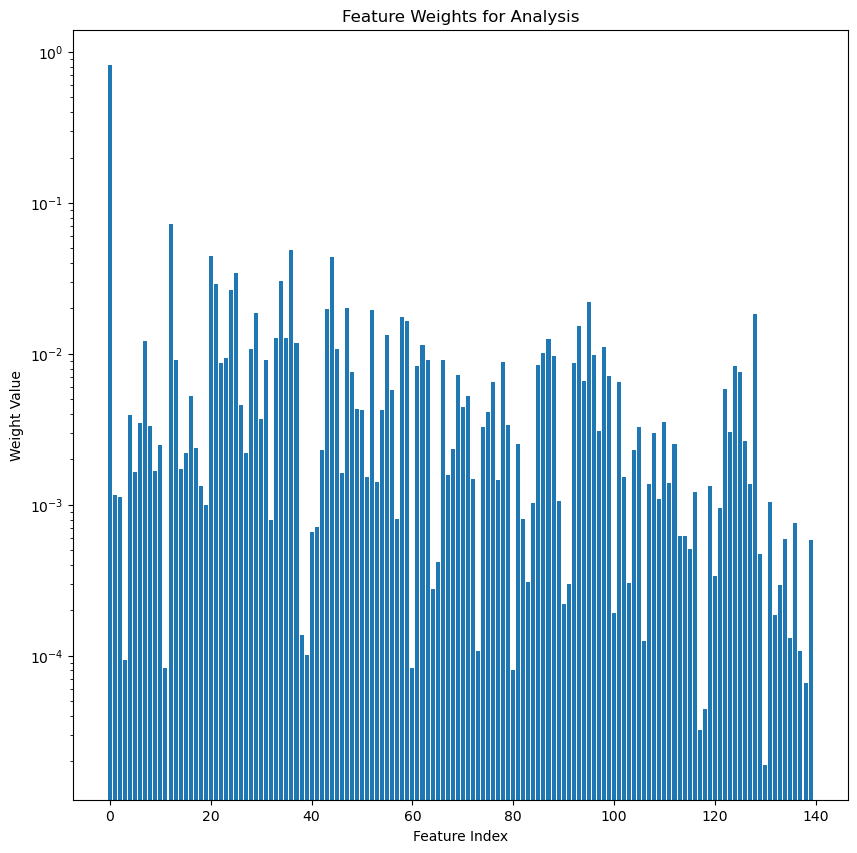

In [123]:
plt.figure(figsize=(10, 10))
plt.bar(range(len(w)), np.abs(w))
plt.yscale('log')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Feature Weights for Analysis')
plt.show()

# **Prediction on test data**

In [137]:
start_time = datetime.datetime.now()

data_te = np.ones(x_test.shape)

for i in range(data_te.shape[1]):
    d, _ = standardize_clean(x_test[:, i])
    data_te[:, i] = d
    
data_var_te = data_te[:, zero_var_features]
data_var_te = np.squeeze(data_var_te, axis = 1)
data_cleaned_te = data_var_te[:, 9:]

data_test = data_cleaned_te[:, pca_indices]
data_test = data_test[:, :(idx + 1)]

end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds")

Execution time 2.531962 seconds


In [131]:
tx_te = np.c_[np.ones(data_test.shape[0]), data_test]
print(tx_te.shape)

(109379, 140)


In [132]:
y_te = np.dot(tx_te, w)
print(y_te.shape)

(109379,)


In [138]:
pred_te = y_te

pred_te[pred_te > 0] = 1
pred_te[pred_te < 0] = -1

indices_one = np.where(pred_te == 1)

In [139]:
create_csv_submission(test_ids, pred_te, "../data/lin_reg.csv")